<h1>Ejercicio 3</h1>

Se improtan los códigos de exploración de datos:

In [61]:
include("exploratoryDataAnalysis.jl")

┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /Users/fau/.julia/juliaup/julia-1.11.1+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/Pkg/src/Pkg.jl:787


El paquete "CSV" ya está instalado.
El paquete "CSV" se ha cargado exitosamente.
El paquete "DataFrames" ya está instalado.
El paquete "DataFrames" se ha cargado exitosamente.
El paquete "Statistics" ya está instalado.


┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /Users/fau/.julia/juliaup/julia-1.11.1+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/Pkg/src/Pkg.jl:787
┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /Users/fau/.julia/juliaup/julia-1.11.1+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/Pkg/src/Pkg.jl:787


El paquete "Statistics" se ha cargado exitosamente.
El paquete "Plots" ya está instalado.
El paquete "Plots" se ha cargado exitosamente.
El paquete "Random" ya está instalado.
El paquete "Random" se ha cargado exitosamente.
El paquete "GLMNet" ya está instalado.
El paquete "GLMNet" se ha cargado exitosamente.
El paquete "StatsBase" ya está instalado.
El paquete "StatsBase" se ha cargado exitosamente.
El paquete "ROCAnalysis" ya está instalado.
El paquete "ROCAnalysis" se ha cargado exitosamente.
El paquete "DecisionTree" ya está instalado.
El paquete "DecisionTree" se ha cargado exitosamente.
El paquete "MLDataUtils" ya está instalado.
El paquete "MLDataUtils" se ha cargado exitosamente.
El paquete "NearestNeighbors" ya está instalado.
El paquete "NearestNeighbors" se ha cargado exitosamente.
El paquete "LIBSVM" ya está instalado.
El paquete "LIBSVM" se ha cargado exitosamente.


┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /Users/fau/.julia/juliaup/julia-1.11.1+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/Pkg/src/Pkg.jl:787
┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /Users/fau/.julia/juliaup/julia-1.11.1+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/Pkg/src/Pkg.jl:787
┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /Users/fau/.julia/juliaup/julia-1.11.1+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/Pkg/src/Pkg.jl:787
┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /Users/fau/.julia/juliaup/julia-1.11.1+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/Pkg/src/Pkg.jl:787
┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /Users/fau/.julia/juliaup/julia-1.11.1+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/Pkg/src/Pkg.jl:787
┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /Users/fau/.julia/juliaup/julia-1.11.1+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/Pkg/src/Pkg.jl:787
┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /Users/fa

run (generic function with 2 methods)

Paquetes usados en el proyecto:
* "CSV", 
* "DataFrames", 
* "Statistics", 
* "Plots", 
* "Random",
* "GLMNet",
* "StatsBase",
* "DecisionTree",
* "MLDataUtils",
* "NearestNeighbors",
* "LIBSVM"

<h2>1.- Importar datos </h2>

In [62]:
ruta="dat/Smarket.csv"
df=leer_csv_como_dataframe(ruta)
dic_tipos_columnas, nombres_columnas, datatype_columnas=dataType(df)

for (col, tipo) in zip(nombres_columnas, datatype_columnas)
    println("$col tipo de dato: $tipo")
end
dataShape(df)

El archivo "dat/Smarket.csv" se ha cargado exitosamente.
Se creó el diccionario con el nombre de columna como llave y tipo de dato como valor del dataframe
Se creó el vector con el nombre de columnas del dataframe
Se creó el vector con el tipo de dato de cada columna del dataframe
Lag1 tipo de dato: Float64
Lag3 tipo de dato: Float64
Today tipo de dato: Float64
Lag5 tipo de dato: Float64
Lag4 tipo de dato: Float64
Volume tipo de dato: Float64
Lag2 tipo de dato: Float64
Year tipo de dato: Int64
Direction tipo de dato: String7
Número de filas: 1250
Número de columnas: 9


(1250, 9)

<h2> 2.- Limpieza de datos </h2>

Dado que no existen nulos, validamos los valores del campos String

In [63]:
# Obtener los valores únicos de la columna 'names'
valores_unicos = unique(df.Direction)

2-element Vector{String7}:
 "Up"
 "Down"

Buscamos predecir la función categorica Up o Down. Por tanto tenemos que transformar ambas a una categoria:

In [64]:
# Definir la función que asigna 0 a "Down" y 1 a "Up"
function asignar_valor(direccion)
    if direccion == "Up"
        return 1
    elseif direccion == "Down"
        return 0
    else
        throw(ArgumentError("Valor no reconocido: $direccion"))
    end
end

# Crear un DataFrame de ejemplo
df_ejemplo = DataFrame(direction = ["Up", "Down", "Up", "Down", "Up"])

# Aplicar la función a la columna 'direction' para obtener una nueva columna con los valores 0 y 1
df_ejemplo.valor_direction = map(asignar_valor, df_ejemplo.direction)

# Mostrar el DataFrame resultante
println(df_ejemplo)


5×2 DataFrame
 Row │ direction  valor_direction 
     │ String     Int64           
─────┼────────────────────────────
   1 │ Up                       1
   2 │ Down                     0
   3 │ Up                       1
   4 │ Down                     0
   5 │ Up                       1


Aplicamos lo anterior a nuestro DF.

In [65]:
# Aplicar la función a la columna 'direction' para obtener una nueva columna con los valores 0 y 1
df.Valor = map(asignar_valor, df.Direction)
dataShape(df)

#Creamos un df filtrado con sólo las variables numericas para evaluar correlaciones
df_filtrado=eliminarStringsDf(df)
dic_tipos_columnas_filtrado, nombres_columnas_filtrado, datatype_columnas_filtrado=dataType(df_filtrado)
for (col, tipo) in zip(nombres_columnas_filtrado, datatype_columnas_filtrado)
    println("$col tipo de dato: $tipo")
end
dataShape(df_filtrado)


Número de filas: 1250
Número de columnas: 10
El número de columnas conservadas que no son String son: 9
Se creó el diccionario con el nombre de columna como llave y tipo de dato como valor del dataframe
Se creó el vector con el nombre de columnas del dataframe
Se creó el vector con el tipo de dato de cada columna del dataframe
Lag1 tipo de dato: Float64
Lag3 tipo de dato: Float64
Today tipo de dato: Float64
Lag5 tipo de dato: Float64
Lag4 tipo de dato: Float64
Volume tipo de dato: Float64
Lag2 tipo de dato: Float64
Year tipo de dato: Int64
Valor tipo de dato: Int64
Número de filas: 1250
Número de columnas: 9


(1250, 9)

Validación de correlaciones

In [66]:
  #----A partir de un threshold determinar columnas con alta correlación:
  threshold=0.90
  relation= >=
  variablesCorrelacionadas, df_correlacion=dfCorrelaciónYDiccionario(df_filtrado, threshold, relation)

  # Imprimir cada clave y su valor
for (clave, valor) in variablesCorrelacionadas
  println("Clave: $clave, Valor: $valor")
end

dataShape(df_correlacion)

Clave: Lag1, Valor: String[]
Clave: Lag3, Valor: String[]
Clave: Today, Valor: String[]
Clave: Lag5, Valor: String[]
Clave: Lag4, Valor: String[]
Clave: Volume, Valor: String[]
Clave: Lag2, Valor: String[]
Clave: Year, Valor: String[]
Clave: Valor, Valor: String[]
Número de filas: 1250
Número de columnas: 9


(1250, 9)

Ninguna variable tiene alta correlación.

<h2>3.- Implentación de algoritmos de clasificación  </h2>

<h3>3.1- Definición de la data para pruebas y para entrenamiento </h3>

Definimos un test aleatorio con 80% de los datos para su entrenamiento.

In [67]:
# Generaremos una partición aleatoria de un dataframe
data = df_correlacion

# Establecer un seed para reproducibilidad
Random.seed!(42)

# Definir el porcentaje de datos para el conjunto de entrenamiento (por ejemplo, 80%)
train_percentage = 0.6
n_train = Int64(floor(train_percentage * nrow(data)))  # Número de registros para entrenamiento

# Crear un índice aleatorio para dividir el DataFrame
indices = randperm(nrow(data))

# Dividir los datos en conjuntos de entrenamiento y prueba
train_data = data[indices[1:n_train], :]
test_data = data[indices[n_train+1:end], :]

# Verificar tamaños de los conjuntos
println("Tamaño del conjunto de entrenamiento: ")
dataShape(train_data)
println("Tamaño del conjunto de prueba: ")
dataShape(test_data)

# Separar las variables dependientes e independientes del dataset de entrenamiento
X_train = Matrix(train_data[:, Not(:Valor)])  # Tomamos todas las columnas menos 'Valor' como características
y_train = train_data.Valor  # 'Valor' es la variable objetivo

# Separar las variables dependientes e independientes del dataset de test
X_test = Matrix(test_data[:, Not(:Valor)])  # Tomamos todas las columnas menos 'Valor' como características
y_test = test_data.Valor  # 'Valor' es la variable objetivo

# Verificar tamaños de los conjuntos
println("Tamaño del conjunto X de entrenamiento: ")
dataShape(X_train)
println("Tamaño del conjunto Y de entrenamiento: ")
println(size(y_train))

# Verificar tamaños de los conjuntos
println("Tamaño del conjunto X de test: ")
dataShape(X_test)
println("Tamaño del conjunto Y de test: ")
println((size(y_test)))

Tamaño del conjunto de entrenamiento: 
Número de filas: 750
Número de columnas: 9
Tamaño del conjunto de prueba: 
Número de filas: 500
Número de columnas: 9
Tamaño del conjunto X de entrenamiento: 
Número de filas: 750
Número de columnas: 8
Tamaño del conjunto Y de entrenamiento: 
(750,)
Tamaño del conjunto X de test: 
Número de filas: 500
Número de columnas: 8
Tamaño del conjunto Y de test: 
(500,)


<h3>3.2- Definición algoritmos </h3>

<h4>3.2.1.- Algoritmo Lasso: </h4>
Referencia: https://glmnet.stanford.edu/articles/glmnet.html

$$
\alpha = 1 
$$


<h5>3.2.1.1- Algoritmo Lasso ejemplo con datos aleatorios para aprender sobre modelos: </h4>

In [68]:
using GLMNet
using DataFrames

Random.seed!(42)

# Crear un DataFrame de ejemplo
df_random = DataFrame(
    Lag1 = randn(100),  
    Lag3 = randn(100),
    Today = randn(100),
    Lag5 = randn(100),
    Lag4 = randn(100),
    Volume = randn(100),
    Lag2 = randn(100),
    Year = rand(100) .< 0.5,  # Variable binaria
    Valor = rand(100) .< 0.5  # Objetivo binario
)

# Separar las variables dependientes e independientes
X_train_random = Matrix(df_random[:, Not(:Valor)])  # Tomamos todas las columnas menos 'Valor' como características
y_train_random = df_random.Valor  # 'Valor' es la variable objetivo

# Convertir las etiquetas a Float64 si es necesario
y_train_random = Float64.(y_train_random)  # Convertir la variable 'Valor' de Boolean a Float64

Random.seed!(41)
# Crear un DataFrame de ejemplo de prueba
df_test_random = DataFrame(
    Lag1 = randn(100),  
    Lag3 = randn(100),
    Today = randn(100),
    Lag5 = randn(100),
    Lag4 = randn(100),
    Volume = randn(100),
    Lag2 = randn(100),
    Year = rand(100) .< 0.5,  # Variable binaria
    Valor = rand(100) .< 0.5  # Objetivo binario
)

# Separar las variables dependientes e independientes
X_test_random = Matrix(df_test_random[:, Not(:Valor)])  # Tomamos todas las columnas menos 'Valor' como características
y_test_random = df_random.Valor  # 'Valor' es la variable objetivo

# Convertir las etiquetas a Float64 si es necesario
y_test_random = Float64.(y_test_random)  # Convertir la variable 'Valor' de Boolean a Float64

###### best lambda
# Ajustar el modelo con validación cruzada
cv_model = glmnetcv(X_train_random, y_train_random, alpha=1.0)

# Obtener el índice del mejor lambda (menor error promedio)
best_lambda_index = argmin(cv_model.meanloss)
best_lambda = cv_model.lambda[best_lambda_index]
println("Mejor lambda encontrado: ", best_lambda)

# Ajustar el modelo LASSO con penalización L1 (lambda es un vector de regularización)
lambda_values = [best_lambda,best_lambda+.000000001]  # Un rango de valores de lambda
println(lambda_values)

#####

# Ajustar el modelo LASSO con penalización L1 (lambda es un vector de regularización)
model = glmnet(X_train_random, y_train_random, alpha=1.0, lambda=lambda_values)  # alpha=1.0 para LASSO

# Realizar las predicciones con el modelo ajustado
y_prob_LASSO_random = GLMNet.predict(model, X_test_random)[:,1]  # Probabilidades de clase 1
size(y_prob_LASSO_random)


Mejor lambda encontrado: 0.0377036969983495
[0.0377036969983495, 0.0377036979983495]


(100,)

<h5>3.2.1.2.- Algoritmo Lasso aplicado: </h4>

1.- Buscamos el mejor lambda que minimice la perdida

In [69]:
###### best lambda
# Ajustar el modelo con validación cruzada
cv_model_LASSO = glmnetcv(X_train, y_train, alpha=1.0)

# Obtener el índice del mejor lambda (menor error promedio)
best_lambda_index = argmin(cv_model_LASSO.meanloss)
best_lambda = cv_model_LASSO.lambda[best_lambda_index]
println("Mejor lambda encontrado: ", best_lambda)

# Ajustar el modelo LASSO con penalización L1 (lambda es un vector de regularización)
lambda_values = [best_lambda,best_lambda+.000000001]  # Un rango de valores de lambda
println(lambda_values)


Mejor lambda encontrado: 0.015653514127538057
[0.015653514127538057, 0.015653515127538056]


2.- Una vez con el mejor lambda se genera el modelo. 
La función de glmnet requiere un vector de mínimo dos lambdas.

In [70]:
# Ajustar el modelo LASSO con penalización L1 (lambda es un vector de regularización)
model_LASSO = glmnet(X_train, y_train, alpha=1.0, lambda=lambda_values)  # alpha=1.0 para LASSO

# Realizar las predicciones con el modelo ajustado
y_prob_LASSO = GLMNet.predict(model_LASSO, X_test)[:,1]  # Probabilidades de clase 1
size(y_prob_LASSO)

(500,)

3.- El tamaño corresponde a nuestro valor de prueba.

<h4>3.2.2.- Algoritmo Ridge: </h4>
Referencia: https://glmnet.stanford.edu/articles/glmnet.html

$$
\alpha = 0 
$$

1.- Buscar la mejor lambda

In [71]:
###### best lambda
# Ajustar el modelo con validación cruzada
cv_model_Ridge = glmnetcv(X_train, y_train, alpha=0.0)

# Obtener el índice del mejor lambda (menor error promedio)
best_lambda_index_Ridge = argmin(cv_model_Ridge.meanloss)
best_lambda_Ridge = cv_model_Ridge.lambda[best_lambda_index_Ridge]
println("Mejor lambda encontrado: ", best_lambda_Ridge)

# Ajustar el modelo Ridge
lambda_values_Ridge = [best_lambda_Ridge,best_lambda_Ridge+.000000001]  # Un rango de valores de lambda
println(lambda_values_Ridge)

Mejor lambda encontrado: 0.0370125684252591
[0.0370125684252591, 0.0370125694252591]



2.- Una vez con el mejor lambda se genera el modelo. 
La función de glmnet requiere un vector de mínimo dos lambdas.

In [72]:
# Ajustar el modelo Ridge
model_Ridge = glmnet(X_train, y_train, alpha=0.0, lambda=lambda_values_Ridge)  # alpha=0.0 para Ridge

# Realizar las predicciones con el modelo ajustado
y_prob_Ridge = GLMNet.predict(model_Ridge, X_test)[:,1]  # Probabilidades de clase 1
size(y_prob_Ridge)

(500,)

<h4>3.2.3.- Algoritmo Elastic Net: </h4>
Referencia: https://glmnet.stanford.edu/articles/glmnet.html

$$
0 < \alpha < 1 
$$

Usaremos $\alpha=0.5$

1.- Buscar la mejor lambda

In [73]:
###### best lambda
# Ajustar el modelo con validación cruzada
cv_model_Elastic = glmnetcv(X_train, y_train, alpha=0.5)

# Obtener el índice del mejor lambda (menor error promedio)
best_lambda_index_Elastic = argmin(cv_model_Elastic.meanloss)
best_lambda_Elastic = cv_model_Elastic.lambda[best_lambda_index_Elastic]
println("Mejor lambda encontrado: ", best_lambda_Elastic)

# Ajustar el modelo Elastic
lambda_values_Elastic = [best_lambda_Elastic,best_lambda_Elastic+.000000001]  # Un rango de valores de lambda
println(lambda_values_Elastic)

Mejor lambda encontrado: 0.0179150325997211
[0.0179150325997211, 0.0179150335997211]



2.- Una vez con el mejor lambda se genera el modelo. 
La función de glmnet requiere un vector de mínimo dos lambdas.

In [74]:
# Ajustar el modelo Elastic
model_Elastic = glmnet(X_train, y_train, alpha=0.5, lambda=lambda_values_Elastic)  # alpha=0.5 para Elastic

# Realizar las predicciones con el modelo ajustado
y_prob_Elastic = GLMNet.predict(model_Elastic, X_test)[:,1]  # Probabilidades de clase 1
size(y_prob_Elastic)

(500,)

<h4>3.2.4.- Algoritmo Árbol de decisión: </h4>

In [75]:
# Entrenar el modelo de árbol de decisión
model_tree = DecisionTreeClassifier(
    #n_subfeatures=2,    
    max_depth=2,               # Profundidad máxima del árbol
    min_samples_split=2,        # Mínimo número de muestras para dividir un nodo
    min_samples_leaf=3          # Mínimo número de muestras en una hoja
    )

DecisionTree.fit!(model_tree, X_train, y_train)

print_tree(model_tree)

# Realizar predicciones de probabilidad
y_prob_tree = DecisionTree.predict_proba(model_tree, X_test)[:,2]
size(y_prob_tree)


Feature 8 < -0.0005 ?
├─ 0 : 356/356
└─ 1 : 394/394


(500,)

Comprobación del modelo:

In [76]:
Perfect_fit=0
for (i, value) in enumerate(df_filtrado.Today)
    if value < -0.0005
        if 0 == df_filtrado.Valor[i]
            Perfect_fit+=1
        end
    else
        if 1 == df_filtrado.Valor[i]
            Perfect_fit+=1
        end
    end
end

println(Perfect_fit)


1250


El ajuste es perfecto con la siguiente condición:


Today < -0.0005
si sí : Valor = 0 : Direction = Down 
si no : Valor = 1 : Direction = True

<h4>3.2.5.- Algoritmo Random Forest: </h4>


In [77]:
# Configurar el modelo Random Forest
model_forest = DecisionTree.RandomForestClassifier(
    n_trees=100,               # Número de árboles
    max_depth=10,              # Profundidad máxima de los árboles
    min_samples_leaf=2,        # Mínimo de muestras en una hoja
    min_samples_split=2,       # Mínimo de muestras para dividir un nodo
    rng=Random.MersenneTwister(42) # Semilla para reproducibilidad
)

# Entrenar el modelo con el conjunto de entrenamiento
DecisionTree.fit!(model_forest, X_train, y_train)

# Predecir probabilidades en el conjunto de prueba
y_prob_forest = predict_proba(model_forest, X_test)[:,2]
size(y_prob_forest)

(500,)

<h4>3.2.6.- Nearest Neighbors </h4>

Implementación del modelo:

In [78]:
# Crear el modelo k-NN utilizando KDTree
model_knn = NearestNeighbors.KDTree(X_train)

# Función para predecir la probabilidad de la clase 1 usando k-NN
function predict_prob_knn(model, X_test, y_train, k)
    probas = Float64[]  # Lista para guardar probabilidades
    for x in eachrow(X_test)  # Para cada muestra en el conjunto de prueba
        # Encontrar los índices de los k vecinos más cercanos
        neighbors_indices, _ = NearestNeighbors.knn(model, x, k, true)
        # Calcular la proporción de vecinos con y_train == 1
        prob = mean(y_train[neighbors_indices] .== 1)
        push!(probas, prob)
    end
    return probas
end


predict_prob_knn (generic function with 1 method)

Determinación de mejor K dado un umbral fijo de 0.5:

In [79]:
# Función para calcular precisión (accuracy)
function accuracy(y_true, y_pred)
    return mean(y_true .== y_pred)
end

# Evaluar precisión para diferentes valores de k
k_values = 1:8  # Probar valores de k de 1 a 8
accuracies = Float64[]

for k in k_values
    y_pred_prob = predict_prob_knn(model_knn, X_test, y_train, k)
    # Convertir probabilidades en predicciones binarias (umbral 0.5)
    y_pred = y_pred_prob .>= 0.5
    # Calcular precisión
    acc = accuracy(y_test, y_pred)
    push!(accuracies, acc)
    println("Precisión para k=$k: $acc")
end

# Encontrar el mejor valor de k
best_k = k_values[argmax(accuracies)]
println("El mejor valor de k es $best_k con una precisión de $(maximum(accuracies)) con un umbral de 0.5")

Precisión para k=1: 0.508
Precisión para k=2: 0.508
Precisión para k=3: 0.492
Precisión para k=4: 0.492
Precisión para k=5: 0.492
Precisión para k=6: 0.508
Precisión para k=7: 0.492
Precisión para k=8: 0.508
El mejor valor de k es 1 con una precisión de 0.508 con un umbral de 0.5


In [80]:
# Hacer predicciones con k vecinos (por ejemplo, k=2)
k = 2
y_prob_knn = predict_prob_knn(model_knn, X_test, y_train, k)
size(y_prob_knn)

(500,)

<h4>3.2.7.- Support Vector Machines (SVM) </h4>

Despúes de varias pruebas encontramos que para poder funcionar el modelo se requieren las matrices transpuestas, más no las originales.

In [81]:
# Transponer las matrices
X_train_transpuesta = X_train'
X_test_transpuesta=X_test'

8×500 adjoint(::Matrix{Float64}) with eltype Float64:
 2001.0     2005.0      2002.0     …  2003.0     2003.0     2005.0
    0.546     -0.345      -0.376        -0.762      0.307      1.496
   -1.055      0.219      -0.645        -0.011      0.356     -1.005
    1.299      0.016       0.75          1.143      0.728      0.297
    0.511      0.426      -3.396        -0.052      0.168      0.827
    0.386      0.998      -2.472   …    -0.579     -1.766     -0.071
    1.0896     1.96505     2.5748        1.3561     1.0222     2.70359
   -0.94       0.169      -1.851        -0.64       0.995     -1.502

In [82]:
# Entrenar el modelo SVM
model_svm = LIBSVM.svmtrain(X_train_transpuesta, y_train)

# Predecir las probabilidades de la clase 1
y_prob_svm = LIBSVM.svmpredict(model_svm, X_test_transpuesta)[2][1, :]
size(y_prob_svm)

(500,)

<h2>4.- Analisis de precisión y curvas ROC</h2>

<h3>4.1- Funciones para el análisis ROC</h3>

Requiere: 
* Un vector con la predicción de un modelo 
* Las etiquetas reales de un modelo, es decir la matriz de confusión

El accuracy/precisión se calcula con la fórmula:

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$
 
donde:

TP: Verdaderos Positivos (casos positivos correctamente predichos)
TN: Verdaderos Negativos (casos negativos correctamente predichos)
FP: Falsos Positivos (casos incorrectamente predichos como positivos)
FN: Falsos Negativos (casos incorrectamente predichos como negativos)
 
 Estos datos se calculan por cada umbral para construir el análisis ROC (Receiver Operating Characteristic).

Dicho umbral es el valor que se utiliza para clasificar las predicciones del modelo como positivas o negativas y determina cómo se asignan las etiquetas predichas para cada instancia, basándose en las puntuaciones de probabilidad generadas por el modelo. Para ello se trata como un punto de corte: si la puntuación de una predicción es mayor o igual al umbral, se clasifica como positiva (1), y si es menor, se clasifica como negativa (0).

En el contexto de un modelo binario: 
El umbral se usa para transformar las probabilidades de la clase positiva en decisiones categóricas (positivo o negativo).
Como en nuestro caso.

Si el umbral se establece en 0.5, cualquier predicción superior a 0.5 se clasificará como positivo, mientras que las predicciones menores a 0.5 se clasificarán como negativo.

Si el umbral se ajusta a 0.8, solo aquellas instancias con una probabilidad mayor o igual al 80% serán clasificadas como positivas, haciendo que el modelo sea más estricto.

¿Cómo afecta el umbral al análisis de la curva ROC?
La curva ROC se construye trazando el tasa de verdaderos positivos (TPR) frente a la tasa de falsos positivos (FPR) para diferentes valores de umbral. 

A medida que varías el umbral, se obtienen diferentes combinaciones de TPR y FPR, y la curva ROC muestra cómo se comporta el modelo en relación con estos cambios.

Bajo umbral: Si el umbral es bajo (cerca de 0), el modelo clasificará más instancias como positivas, lo que generalmente aumenta el TPR, pero también puede aumentar el FPR.
Alto umbral: Si el umbral es alto (cerca de 1), el modelo clasificará menos instancias como positivas, lo que puede disminuir tanto el TPR como el FPR.
Umbral óptimo:
El objetivo del análisis de la curva ROC es encontrar un umbral óptimo donde se logre el mejor equilibrio entre el TPR y el FPR. El Area Under the Curve (AUC) es una métrica que se usa para evaluar qué tan bien el modelo separa las clases, y un AUC más cercano a 1 generalmente indica un mejor modelo.

Variar el umbral cambia las tasas de verdaderos y falsos positivos, lo que influye en la forma de la curva ROC.

Encontrar el umbral adecuado es clave para optimizar el rendimiento del modelo según la métrica deseada (por ejemplo, maximizar el TPR y minimizar el FPR).

In [83]:
function AnalisisROCyAUC(predicciones,etiquetas,n_umbral,auc_redondeo=4,loggs=false)
    # Generar diferentes valores de umbral entre 0 y 1
    umbrales = LinRange(0, 1, n_umbral)
    # Inicializar vectores para almacenar TPR y FPR así como la presición
    tprs = Float64[]
    fprs = Float64[]
    accuracy = Float64[]
    # Calcular TPR y FPR para cada umbral
    for umbral in umbrales
        tpr, fpr, accuracyr = calcular_tpr_fpr(predicciones, etiquetas, umbral,loggs)
        push!(tprs, tpr)
        push!(fprs, fpr)
        push!(accuracy,accuracyr)
    end
    # Ordenar FPR y TPR en función de FPR
    orden = sortperm(fprs)  # Índices para ordenar por fprs
    fprs_ordenados = fprs[orden]
    tprs_ordenados = tprs[orden]
    accuracy_ordenados = accuracy[orden]
    umbrales_ordenados = umbrales[orden]
    # Calcular el AUC usando la regla del trapecio / Integración númerica
    auc = round(sum(diff(fprs_ordenados) .* (tprs_ordenados[1:end-1] .+ tprs_ordenados[2:end]) ./ 2),digits=auc_redondeo)
    #println("El Área Bajo la Curva (AUC) es: ", auc)

    return tprs, fprs, accuracy, umbrales, auc, tprs_ordenados, fprs_ordenados, accuracy_ordenados, umbrales_ordenados
end

# Función para calcular TPR y FPR en diferentes umbrales
function calcular_tpr_fpr(predicciones, etiquetas, umbral, loggs=false)
    # Predicciones binarizadas
    predicciones_binarias = predicciones .>= umbral
    # Verdaderos Positivos (TP): predicciones correctas como 1
    tp = sum(predicciones_binarias .== 1 .&& etiquetas .== 1)
    # Falsos Positivos (FP): predicciones incorrectas como 1
    fp = sum(predicciones_binarias .== 1 .&& etiquetas .== 0)
    # Verdaderos Negativos (TN): predicciones correctas como 0
    tn = sum(predicciones_binarias .== 0 .&& etiquetas .== 0)
    # Falsos Negativos (FN): predicciones incorrectas como 0
    fn = sum(predicciones_binarias .== 0 .&& etiquetas .== 1)
    # Calcular TPR y FPR
    tpr = tp / (tp + fn)  # Tasa de verdaderos positivos (recall)
    fpr = fp / (fp + tn)  # Tasa de falsos positivos
    #Calcular la precisión
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    if loggs == true
        println("# Verdaderos Positivos (TP): predicciones correctas como 1: ", tp)
        println("# Falsos Positivos (FP): predicciones incorrectas como 1: ", fp)
        println("# Verdaderos Negativos (TN): predicciones correctas como 0: ", tn)
        println("# Falsos Negativos (FN): predicciones incorrectas como 0: ", fn)
        println("# tasa de verdaderos positivos", tpr)
        println("# Tasa de falsos positivos", fpr)
        println("Precisión: ",accuracy)
    end

    return tpr, fpr, accuracy
end


calcular_tpr_fpr (generic function with 2 methods)

Ejemplo del uso de las funciones con los datos aleatorios:

El auc del modelo LASSO con data random es: 0.512


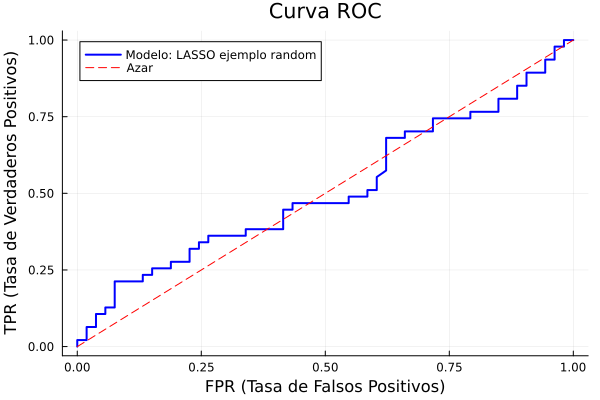

In [84]:
n_umbral=3000
# Simular datos (predicciones y etiquetas reales)
predicciones__random = y_prob_LASSO_random  # Valores de 0 a 1 (predicciones del modelo)
etiquetas__random = y_test_random # Etiquetas binarias (0 o 1)

tprs__random, fprs__random, accuracy__random, umbrales__random, auc__random, tprs_ordenados__random, fprs_ordenados__random, accuracy_ordenados__random, umbrales_ordenados__random= AnalisisROCyAUC(predicciones__random,etiquetas__random,n_umbral)

println("El auc del modelo LASSO con data random es: ", auc__random)

# Graficar la curva ROC
plot(fprs__random, tprs__random, label="Modelo: LASSO ejemplo random", xlabel="FPR (Tasa de Falsos Positivos)", ylabel="TPR (Tasa de Verdaderos Positivos)", title="Curva ROC", linewidth=2, color=:blue)

# Añadir línea diagonal (clasificador aleatorio)
plot!([0, 1], [0, 1], linestyle=:dash, label="Azar", color=:red)

# Mostrar el gráfico


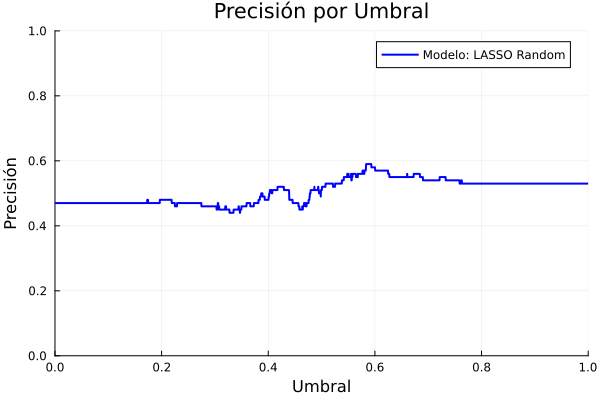

In [85]:
# Graficar la curva ROC
plot(umbrales__random, accuracy__random, label="Modelo: LASSO Random", xlabel="Umbral", ylabel="Precisión", title="Precisión por Umbral", linewidth=2, color=:blue)
# Establecer los límites de los ejes X e Y
xlims!(0, 1)
ylims!(0, 1)

Lo aplicamos a nuestros modelos:

El auc del modelo LASSO es: 0.8924
El auc del modelo Elastic es: 0.8877
El auc del modelo Ridge es: 0.8898
El auc del modelo Support Vector Machine es: 0.0467
El auc del modelo Nearest Neighbors con k=1 es: 0.5
El auc del modelo Árbol de decisión es: 1.0
El auc del modelo Random Forest es: 1.0


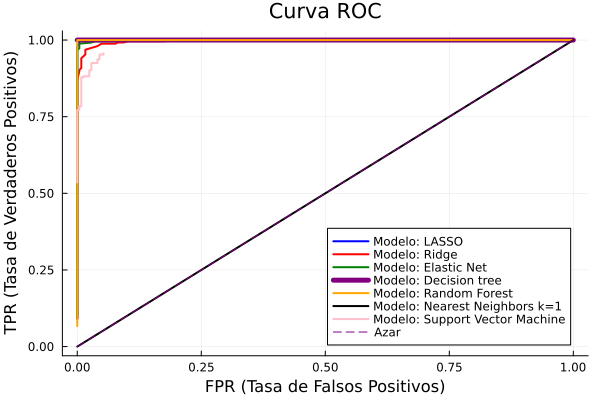

In [102]:
n_umbral=300
# Simular datos (predicciones y etiquetas reales)
predicciones_LASSO = y_prob_LASSO  # Valores de 0 a 1 (predicciones del modelo)
predicciones_Elastic = y_prob_Elastic  # Valores de 0 a 1 (predicciones del modelo)
predicciones_Ridge = y_prob_Ridge  # Valores de 0 a 1 (predicciones del modelo)
predicciones_tree = y_prob_tree  # Valores de 0 a 1 (predicciones del modelo)
predicciones_forest= y_prob_forest # Valores de 0 a 1 (predicciones del modelo)
predicciones_knn= y_prob_knn # Valores de 0 a 1 (predicciones del modelo)
predicciones_svm= y_prob_svm # Valores de 0 a 1 (predicciones del modelo)

etiquetas = y_test # Etiquetas binarias (0 o 1)

tprs_LASSO, fprs_LASSO, accuracy_LASSO, umbrales_LASSO, auc_LASSO, tprs_ordenados_LASSO, fprs_ordenados_LASSO, accuracy_ordenados_LASSO, umbrales_ordenados_LASSO= AnalisisROCyAUC(predicciones_LASSO,etiquetas,n_umbral)
tprs_Ridge, fprs_Ridge, accuracy_Ridge, umbrales_Ridge, auc_Ridge, tprs_ordenados_Ridge, fprs_ordenados_Ridge, accuracy_ordenados_Ridge, umbrales_ordenados_Ridge= AnalisisROCyAUC(predicciones_Ridge,etiquetas,n_umbral)
tprs_Elastic, fprs_Elastic, accuracy_Elastic, umbrales_Elastic, auc_Elastic, tprs_ordenados_Elastic, fprs_ordenados_Elastic, accuracy_ordenados_Elastic, umbrales_ordenados_Elastic= AnalisisROCyAUC(predicciones_Elastic,etiquetas,n_umbral)
tprs_tree, fprs_tree, accuracy_tree, umbrales_tree, auc_tree, tprs_ordenados_tree, fprs_ordenados_tree, accuracy_ordenados_tree, umbrales_ordenados_tree= AnalisisROCyAUC(predicciones_tree,etiquetas,n_umbral,true)
tprs_forest, fprs_forest, accuracy_forest, umbrales_forest, auc_forest, tprs_ordenados_forest, fprs_ordenados_forest, accuracy_ordenados_forest, umbrales_ordenados_forest= AnalisisROCyAUC(predicciones_forest,etiquetas,n_umbral,true)
tprs_knn, fprs_knn, accuracy_knn, umbrales_knn, auc_knn, tprs_ordenados_knn, fprs_ordenados_knn, accuracy_ordenados_knn, umbrales_ordenados_knn= AnalisisROCyAUC(predicciones_knn,etiquetas,n_umbral,true)
tprs_svm, fprs_svm, accuracy_svm, umbrales_svm, auc_svm, tprs_ordenados_svm, fprs_ordenados_svm, accuracy_ordenados_svm, umbrales_ordenados_svm= AnalisisROCyAUC(predicciones_svm,etiquetas,n_umbral,true)

auc_svm=round(sum(diff(fprs_ordenados_svm) .* (tprs_ordenados_svm[1:end-1] .+ tprs_ordenados_svm[2:end]) ./ 2),digits=4)

println("El auc del modelo LASSO es: ", auc_LASSO)
println("El auc del modelo Elastic es: ", auc_Elastic)
println("El auc del modelo Ridge es: ", auc_Ridge)
println("El auc del modelo Support Vector Machine es: ", auc_svm)
println("El auc del modelo Nearest Neighbors con k=1 es: ", auc_knn)
println("El auc del modelo Árbol de decisión es: ", auc_tree)
println("El auc del modelo Random Forest es: ", auc_forest)

# Graficar la curva ROC
plot(fprs_LASSO, tprs_LASSO, label="Modelo: LASSO", xlabel="FPR (Tasa de Falsos Positivos)", ylabel="TPR (Tasa de Verdaderos Positivos)", title="Curva ROC", linewidth=2, color=:blue)
plot!(fprs_Ridge, tprs_Ridge, label="Modelo: Ridge", xlabel="FPR (Tasa de Falsos Positivos)", ylabel="TPR (Tasa de Verdaderos Positivos)", title="Curva ROC", linewidth=2, color=:red)
plot!(fprs_Elastic, tprs_Elastic, label="Modelo: Elastic Net", xlabel="FPR (Tasa de Falsos Positivos)", ylabel="TPR (Tasa de Verdaderos Positivos)", title="Curva ROC", linewidth=2, color=:green)
plot!(fprs_tree, tprs_tree, label="Modelo: Decision tree", xlabel="FPR (Tasa de Falsos Positivos)", ylabel="TPR (Tasa de Verdaderos Positivos)", title="Curva ROC", linewidth=5, color=:purple)
plot!(fprs_forest, tprs_forest, label="Modelo: Random Forest", xlabel="FPR (Tasa de Falsos Positivos)", ylabel="TPR (Tasa de Verdaderos Positivos)", title="Curva ROC", linewidth=2, color=:orange)
plot!(fprs_knn, tprs_knn, label="Modelo: Nearest Neighbors k=1", xlabel="FPR (Tasa de Falsos Positivos)", ylabel="TPR (Tasa de Verdaderos Positivos)", title="Curva ROC", linewidth=2, color=:black)
plot!(fprs_svm, tprs_svm, label="Modelo: Support Vector Machine", xlabel="FPR (Tasa de Falsos Positivos)", ylabel="TPR (Tasa de Verdaderos Positivos)", title="Curva ROC", linewidth=2, color=:pink)

# Añadir línea diagonal (clasificador aleatorio)
plot!([0, 1], [0, 1], linestyle=:dash, label="Azar", color=:purple)
# Establecer los límites de los ejes X e Y
#xlims!(-.05, 1.05)
#ylims!(-.05, 1.05)

# Mostrar el gráfico

#Guardar grafico
#rutaROC="fig/CurvaROC.png"
#Plots.savefig(manejoDirectorio(rutaROC))

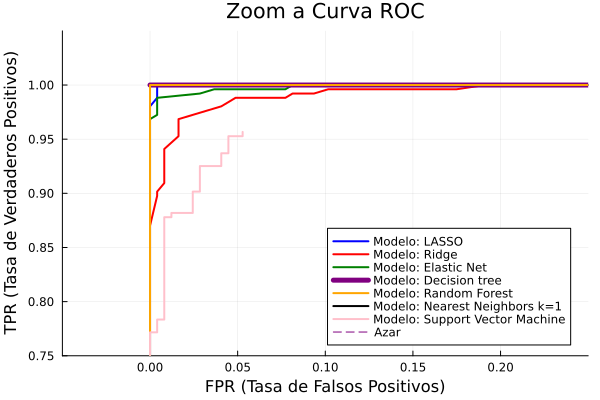

In [109]:

# Graficar la curva ROC
plot(fprs_LASSO, tprs_LASSO, label="Modelo: LASSO", xlabel="FPR (Tasa de Falsos Positivos)", ylabel="TPR (Tasa de Verdaderos Positivos)", title="Zoom a Curva ROC", linewidth=2, color=:blue)
plot!(fprs_Ridge, tprs_Ridge, label="Modelo: Ridge", xlabel="FPR (Tasa de Falsos Positivos)", ylabel="TPR (Tasa de Verdaderos Positivos)", linewidth=2, color=:red)
plot!(fprs_Elastic, tprs_Elastic, label="Modelo: Elastic Net", xlabel="FPR (Tasa de Falsos Positivos)", ylabel="TPR (Tasa de Verdaderos Positivos)", linewidth=2, color=:green)
plot!(fprs_tree, tprs_tree, label="Modelo: Decision tree", xlabel="FPR (Tasa de Falsos Positivos)", ylabel="TPR (Tasa de Verdaderos Positivos)", linewidth=5, color=:purple)
plot!(fprs_forest, tprs_forest, label="Modelo: Random Forest", xlabel="FPR (Tasa de Falsos Positivos)", ylabel="TPR (Tasa de Verdaderos Positivos)", linewidth=2, color=:orange)
plot!(fprs_knn, tprs_knn, label="Modelo: Nearest Neighbors k=1", xlabel="FPR (Tasa de Falsos Positivos)", ylabel="TPR (Tasa de Verdaderos Positivos)", linewidth=2, color=:black)
plot!(fprs_svm, tprs_svm, label="Modelo: Support Vector Machine", xlabel="FPR (Tasa de Falsos Positivos)", ylabel="TPR (Tasa de Verdaderos Positivos)", linewidth=2, color=:pink)

# Añadir línea diagonal (clasificador aleatorio)
plot!([0, 1], [0, 1], linestyle=:dash, label="Azar", color=:purple)
# Establecer los límites de los ejes X e Y
xlims!(-.05, .25)
ylims!(.75, 1.05)

#Guardar grafico
#rutaROC="fig/ZOOMCurvaROC.png"
#Plots.savefig(manejoDirectorio(rutaROC))

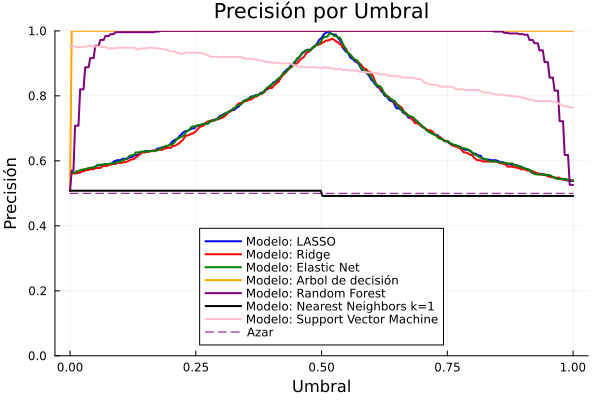

In [121]:
# Graficar la curva ROC
plot(umbrales_LASSO, accuracy_LASSO, label="Modelo: LASSO", xlabel="Umbral", ylabel="Precisión", title="Precisión por Umbral", linewidth=2, color=:blue,  legend=:bottom)
plot!(umbrales_Ridge, accuracy_Ridge, label="Modelo: Ridge", xlabel="Umbral", ylabel="Precisión", title="Precisión por Umbral", linewidth=2, color=:red)
plot!(umbrales_Elastic, accuracy_Elastic, label="Modelo: Elastic Net", xlabel="Umbral", ylabel="Precisión", title="Precisión por Umbral", linewidth=2, color=:green)
plot!(umbrales_tree, accuracy_tree, label="Modelo: Arbol de decisión", xlabel="Umbral", ylabel="Precisión", title="Precisión por Umbral", linewidth=2, color=:orange)
plot!(umbrales_forest, accuracy_forest, label="Modelo: Random Forest", xlabel="Umbral", ylabel="Precisión", title="Precisión por Umbral", linewidth=2, color=:purple)
plot!(umbrales_knn, accuracy_knn, label="Modelo: Nearest Neighbors k=1", xlabel="Umbral", ylabel="Precisión", title="Precisión por Umbral", linewidth=2, color=:black)
plot!(umbrales_svm, accuracy_svm, label="Modelo: Support Vector Machine", xlabel="Umbral", ylabel="Precisión", title="Precisión por Umbral", linewidth=2, color=:pink)
plot!([0, 1], [0.5, 0.5], linestyle=:dash, label="Azar", color=:purple)
# Establecer los límites de los ejes X e Y
#xlims!(0.0001, 1)
ylims!(0,1)

#Guardar grafico
#rutaROC="fig/PrecisionvsUmbral.png"
#Plots.savefig(manejoDirectorio(rutaROC))